## 2) Salary_hike -> Build a prediction model for Salary_hike

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## 1.Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 2.Import the Data

In [3]:
sal_data = pd.read_csv('Salary_Data.csv')
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 3.Data Understanding

In [4]:
sal_data.shape

(30, 2)

In [5]:
sal_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
sal_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Checking assumptions by plotting

### Scatter Plot

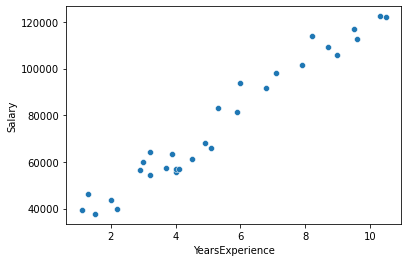

In [6]:
sns.scatterplot(x = 'YearsExperience', y= 'Salary', data = sal_data )
plt.show()

In [7]:
sal_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


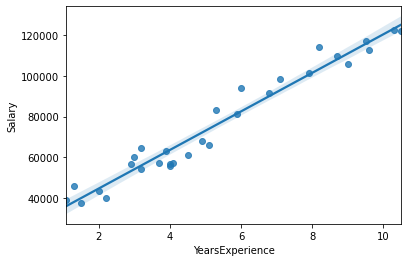

In [8]:
sns.regplot(x = 'YearsExperience', y= 'Salary', data = sal_data )
plt.show()

## 4.Model Building

In [7]:
#Diving the data into input and output
X = sal_data[['YearsExperience']]
y = sal_data['Salary']

In [8]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [9]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [10]:
#Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [11]:
X_train.shape

(24, 1)

In [12]:
X_test.shape

(6, 1)

## 5.Model Training

In [13]:
sal_lin_model = LinearRegression()

In [14]:
sal_lin_model.fit(X_train,y_train)

LinearRegression()

In [15]:
#slope
sal_lin_model.coef_

array([9439.20244618])

In [16]:
sal_lin_model.intercept_

26065.292983138337

## 6.Model Testing

In [17]:
X_test

,YearsExperience
11,4.0
29,10.5
23,8.2
25,9.0
18,5.9
10,3.9


In [18]:
#manual
#y = mx+b
(9326.35422535 * 3.7) + 27529.93890845

62037.449542245

In [19]:
y_test

11     55794.0
29    121872.0
23    113812.0
25    105582.0
18     81363.0
10     63218.0
Name: Salary, dtype: float64

In [20]:
y_test_pred = sal_lin_model.predict(X_test)
y_test_pred

array([ 63822.10276786, 125176.91866803, 103466.75304182, 111018.11499876,
        81756.5874156 ,  62878.18252324])

In [21]:
y_test_pred =y_test_pred.round(decimals = 2)

In [23]:
y_test_pred

array([ 63822.1 , 125176.92, 103466.75, 111018.11,  81756.59,  62878.18])

## 7.Model Evaluation

In [24]:
sal_lin_model.score(X_test,y_test)

0.9439628569611375

In [25]:
r2_score(y_test,y_test_pred)

0.9439628631133004

## 8.Model Deployment

In [26]:
from pickle import dump

In [27]:
dump(sal_lin_model,open('sal_lin_model.pkl','wb'))

In [28]:
from pickle import load

In [29]:
linear_intellegence = load(open('sal_lin_model.pkl','rb'))

In [30]:
linear_intellegence.predict(X_test)

array([ 63822.10276786, 125176.91866803, 103466.75304182, 111018.11499876,
        81756.5874156 ,  62878.18252324])

In [35]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data = pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [32]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,3
1,5


In [34]:
linear_intellegence.predict(data_pred)

array([54382.90032168, 73261.30521404])